### SHAP

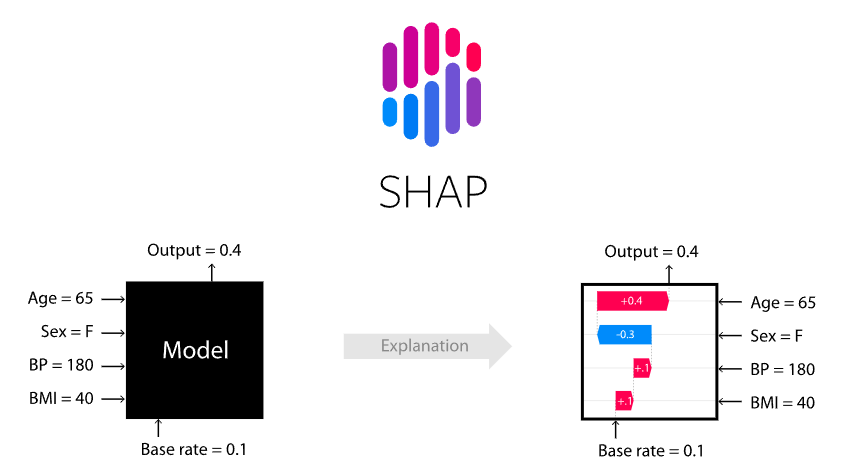

In [46]:
import xgboost
import shap

# train an XGBoost model
X, y = shap.datasets.california()

In [47]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [48]:
y #median house values in California districts

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [49]:
model = xgboost.XGBRegressor().fit(X, y)

In [50]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

In [51]:
shap_values.shape

(20640, 8)

### Waterfall

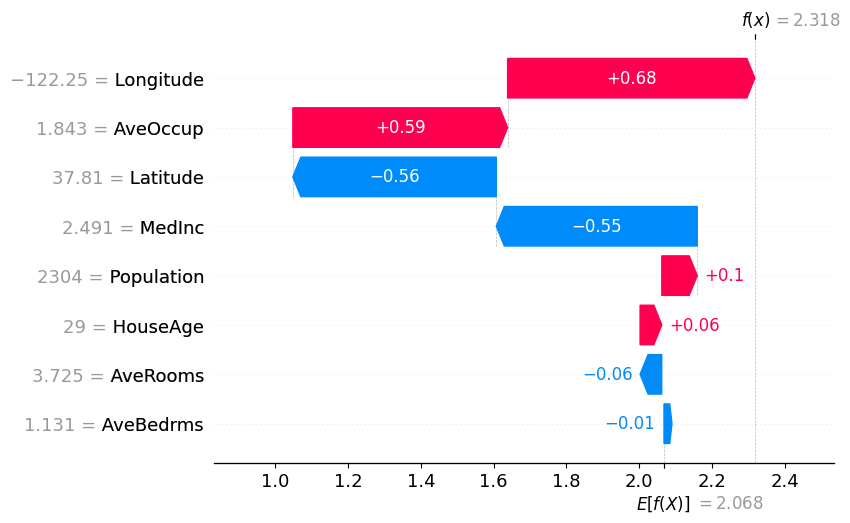

In [54]:

"""
Waterfall Plot 

- It shows how each feature contributes to the model's output for each instance in the dataset.
- Base Value - the average model output over the training dataset we passed.
- SHAP Values - Each feature contributing to push the model output from the base value to the model output.

"""

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[100])

(1.71 + 0.56 - 0.39 + ... )= 4.199

### Force Plot

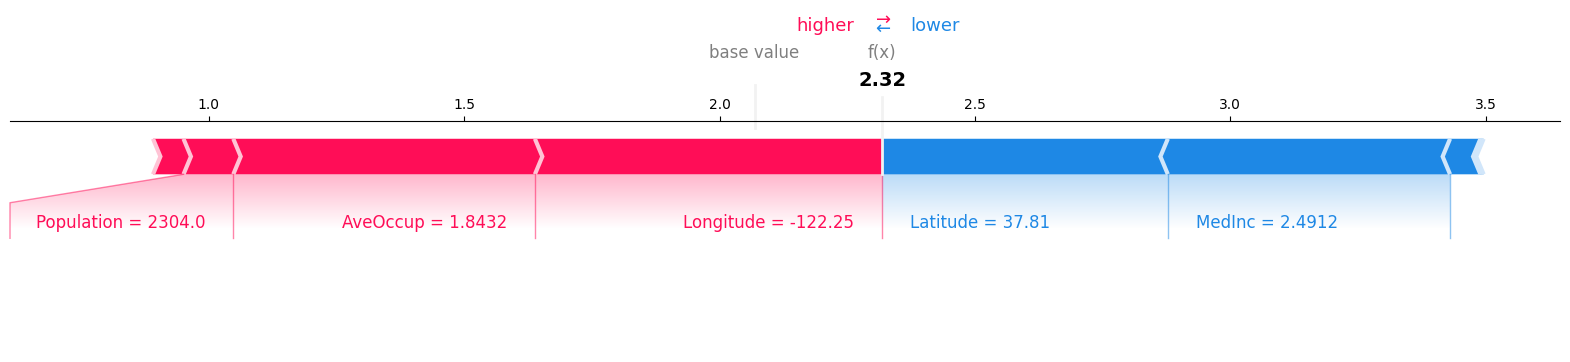

In [53]:
# visualize the first prediction's explanation with a force plot
shap.plots.initjs()
shap.plots.force(shap_values[100], matplotlib=True)

### Force across whole dataset

In [55]:
"""
By rotating the above plot by 90 degrees, we can plot all the data point on the force plot.
"""

# visualize all the training set predictions
shap.plots.force(shap_values[:100])

### Scatter Plot

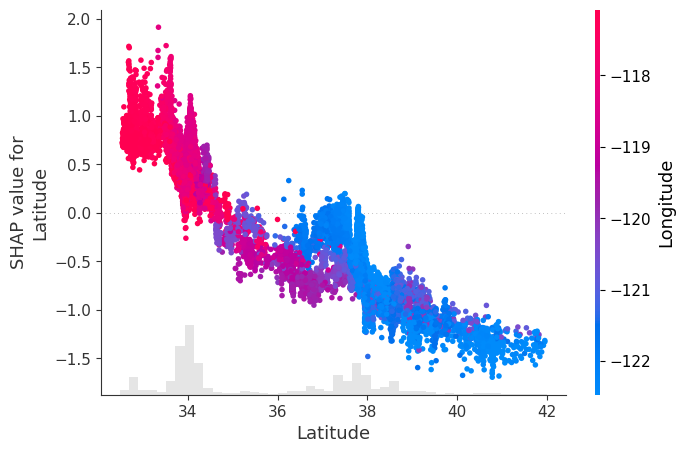

In [56]:
"""
- How single feature effects the output of the model.
- SHAP value of single feature against the value of the feature for all the examples in a dataset.
- It represents how latitude affects the median house value in California districts.
- Vertical dispersion at a single value of latitude represents interaction effects with other features.
- Interaction is represented by Color, color is represented by another feature which is selected by SHAP.

"""

# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "Latitude"], color=shap_values)

### Beeswarm

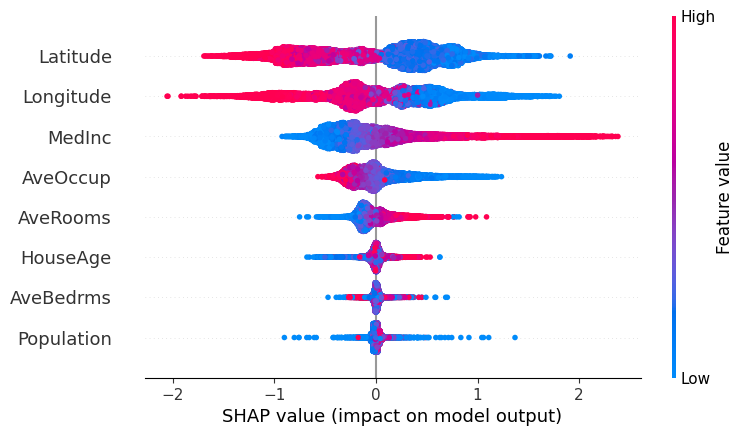

In [57]:
"""
- Overview of features that are most important for a model, we can plot the SHAP values of every feature for every sample.
- Below the features are sorted by the sum of SHAP value magnitudes over all samples, 
- It uses SHAP values to show the distribution of the impacts each feature has on the model output.
- For instance, Higher median incomes increases the predicted home price.
"""

# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

### Bar Plot

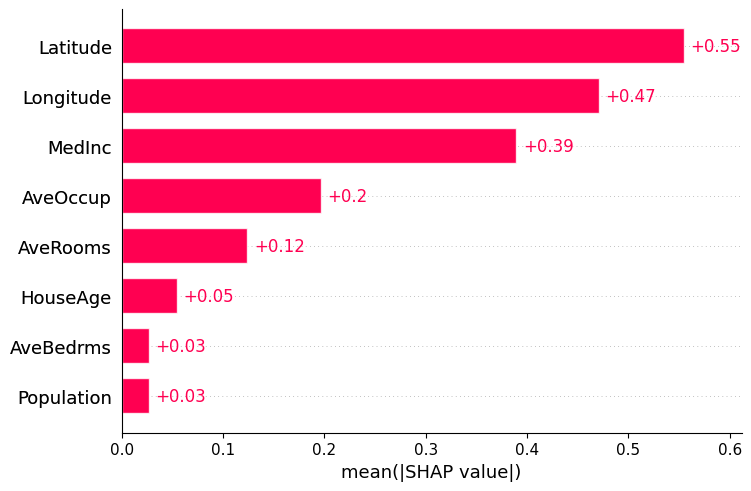

In [58]:
"""
Take the mean absolute value of the SHAP values for each feature to get a standard bar plot!
"""

shap.plots.bar(shap_values)